In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [75]:
focal_adhesion = pd.read_csv("Book3.csv")

In [76]:
focal_adhesion

,Unnamed: 0,X7791_at,X1398_at,X1284_at,X3675_at,X1282_at,X7424_at,X5159_at,X2321_at,X2324_at,...,X5154_at,X5155_at,X2885_at,X595_at,X5295_at,X329_at,Disease,ID,Disease2,Nephrotic
0,1,6.616270,6.650780,6.212293,10.158111,6.542626,5.965278,7.573721,7.400331,5.616704,...,6.348953,4.910223,7.497142,8.763867,7.074309,6.254792,Glomerular,94,MN,1
1,2,7.001047,6.386364,5.273056,9.860777,5.513112,6.616980,7.162280,7.310031,5.399082,...,6.681751,3.884280,7.154931,8.360980,7.308968,6.084218,Glomerular,81,FSGS,1
2,3,6.628755,6.500360,5.677885,9.879791,6.278609,5.795266,6.059988,6.407779,5.094513,...,6.078079,3.860516,6.942900,8.557394,7.141224,6.306339,Glomerular,133,MN,1
3,4,6.984691,6.581776,5.951040,10.673389,6.115012,5.129073,7.756084,8.035208,6.034542,...,6.683461,4.298766,7.325002,8.815787,6.927415,5.868231,Glomerular,102,MN,1
4,5,6.714409,6.629443,6.151001,9.715433,6.422950,6.330880,7.072725,7.855886,5.818230,...,6.026231,4.631380,7.271276,8.059317,7.563310,6.236375,Glomerular,82,FSGS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,6.309457,7.084534,7.136771,10.760538,7.820753,5.256161,8.533344,9.839728,6.076459,...,6.335928,4.546304,6.953539,8.814828,7.700050,6.514003,Glomerular,6,MCD,1
103,104,6.114081,6.623781,5.492398,11.019819,5.803733,5.727388,7.747092,7.482525,5.762355,...,7.402658,4.970225,7.273947,8.238052,7.469386,6.369455,Glomerular,567,MN,1
104,105,7.300323,6.930577,5.488512,10.677016,5.486495,5.454204,8.471081,8.962164,7.130242,...,6.373126,4.488608,7.072283,8.853904,6.795654,6.349480,Glomerular,571,MN,1
105,106,7.256771,6.936422,6.429368,10.618888,6.479440,4.949829,7.867039,8.490338,5.354927,...,6.312014,4.003970,6.713200,7.473833,7.772563,5.519994,Glomerular,569,MN,1


In [77]:
focal_adhesion.dtypes

Unnamed: 0      int64
X7791_at      float64
X1398_at      float64
X1284_at      float64
X3675_at      float64
X1282_at      float64
X7424_at      float64
X5159_at      float64
X2321_at      float64
X2324_at      float64
X23396_at     float64
X81_at        float64
X7094_at      float64
X2316_at      float64
X5829_at      float64
X3611_at      float64
X8503_at      float64
X7410_at      float64
X2889_at      float64
X3678_at      float64
X5154_at      float64
X5155_at      float64
X2885_at      float64
X595_at       float64
X5295_at      float64
X329_at       float64
Disease        object
ID              int64
Disease2       object
Nephrotic       int64
dtype: object

In [78]:
focal_adhesion['Nephrotic'] = focal_adhesion['Nephrotic'].astype(str).astype(int)
focal_adhesion.dtypes

Unnamed: 0      int64
X7791_at      float64
X1398_at      float64
X1284_at      float64
X3675_at      float64
X1282_at      float64
X7424_at      float64
X5159_at      float64
X2321_at      float64
X2324_at      float64
X23396_at     float64
X81_at        float64
X7094_at      float64
X2316_at      float64
X5829_at      float64
X3611_at      float64
X8503_at      float64
X7410_at      float64
X2889_at      float64
X3678_at      float64
X5154_at      float64
X5155_at      float64
X2885_at      float64
X595_at       float64
X5295_at      float64
X329_at       float64
Disease        object
ID              int64
Disease2       object
Nephrotic       int32
dtype: object

In [79]:
focal_adhesion.columns

Index(['Unnamed: 0', 'X7791_at', 'X1398_at', 'X1284_at', 'X3675_at',
       'X1282_at', 'X7424_at', 'X5159_at', 'X2321_at', 'X2324_at', 'X23396_at',
       'X81_at', 'X7094_at', 'X2316_at', 'X5829_at', 'X3611_at', 'X8503_at',
       'X7410_at', 'X2889_at', 'X3678_at', 'X5154_at', 'X5155_at', 'X2885_at',
       'X595_at', 'X5295_at', 'X329_at', 'Disease', 'ID', 'Disease2',
       'Nephrotic'],
      dtype='object')

In [80]:
genename = focal_adhesion.rename(columns = {'X7791_at':'ZYX', 'X1398_at':'CRK', 'X1284_at':'COL4A2', 'X3675_at':'ITGA3',
       'X1282_at':'COL4A1', 'X7424_at':'VEGFC', 'X5159_at':'PDGFRB', 'X2321_at':'FLT1', 'X2324_at':'FLT4', 'X23396_at':'PIP5K1C',
       'X81_at':'ACTN4', 'X7094_at':'TLN1', 'X2316_at':'FLNA', 'X5829_at':'PXN', 'X3611_at':'ILK', 'X8503_at':'PIK3R3',
       'X7410_at':'VAV2', 'X2889_at':'RAPGEF1', 'X3678_at':'ITGA5', 'X5154_at':'PDGFA', 'X5155_at':'PDGFB', 'X2885_at':'GRB2',
       'X595_at':'CCND1', 'X5295_at':'PIK3R1', 'X329_at':'BIRC2'})

In [81]:
genename

,Unnamed: 0,ZYX,CRK,COL4A2,ITGA3,COL4A1,VEGFC,PDGFRB,FLT1,FLT4,...,PDGFA,PDGFB,GRB2,CCND1,PIK3R1,BIRC2,Disease,ID,Disease2,Nephrotic
0,1,6.616270,6.650780,6.212293,10.158111,6.542626,5.965278,7.573721,7.400331,5.616704,...,6.348953,4.910223,7.497142,8.763867,7.074309,6.254792,Glomerular,94,MN,1
1,2,7.001047,6.386364,5.273056,9.860777,5.513112,6.616980,7.162280,7.310031,5.399082,...,6.681751,3.884280,7.154931,8.360980,7.308968,6.084218,Glomerular,81,FSGS,1
2,3,6.628755,6.500360,5.677885,9.879791,6.278609,5.795266,6.059988,6.407779,5.094513,...,6.078079,3.860516,6.942900,8.557394,7.141224,6.306339,Glomerular,133,MN,1
3,4,6.984691,6.581776,5.951040,10.673389,6.115012,5.129073,7.756084,8.035208,6.034542,...,6.683461,4.298766,7.325002,8.815787,6.927415,5.868231,Glomerular,102,MN,1
4,5,6.714409,6.629443,6.151001,9.715433,6.422950,6.330880,7.072725,7.855886,5.818230,...,6.026231,4.631380,7.271276,8.059317,7.563310,6.236375,Glomerular,82,FSGS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,6.309457,7.084534,7.136771,10.760538,7.820753,5.256161,8.533344,9.839728,6.076459,...,6.335928,4.546304,6.953539,8.814828,7.700050,6.514003,Glomerular,6,MCD,1
103,104,6.114081,6.623781,5.492398,11.019819,5.803733,5.727388,7.747092,7.482525,5.762355,...,7.402658,4.970225,7.273947,8.238052,7.469386,6.369455,Glomerular,567,MN,1
104,105,7.300323,6.930577,5.488512,10.677016,5.486495,5.454204,8.471081,8.962164,7.130242,...,6.373126,4.488608,7.072283,8.853904,6.795654,6.349480,Glomerular,571,MN,1
105,106,7.256771,6.936422,6.429368,10.618888,6.479440,4.949829,7.867039,8.490338,5.354927,...,6.312014,4.003970,6.713200,7.473833,7.772563,5.519994,Glomerular,569,MN,1


In [82]:
conda install plotly

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [123]:
import plotly.express as px
import plotly.graph_objects as go

In [124]:
genename_drop = genename.drop(columns = ['Unnamed: 0', 'Disease', 'ID', 'Disease2', 'Nephrotic'])
genename_drop

,ZYX,CRK,COL4A2,ITGA3,COL4A1,VEGFC,PDGFRB,FLT1,FLT4,PIP5K1C,...,PIK3R3,VAV2,RAPGEF1,ITGA5,PDGFA,PDGFB,GRB2,CCND1,PIK3R1,BIRC2
0,6.616270,6.650780,6.212293,10.158111,6.542626,5.965278,7.573721,7.400331,5.616704,4.092312,...,7.734887,5.733396,6.154797,4.728379,6.348953,4.910223,7.497142,8.763867,7.074309,6.254792
1,7.001047,6.386364,5.273056,9.860777,5.513112,6.616980,7.162280,7.310031,5.399082,4.213155,...,7.396918,4.923376,5.828350,5.346675,6.681751,3.884280,7.154931,8.360980,7.308968,6.084218
2,6.628755,6.500360,5.677885,9.879791,6.278609,5.795266,6.059988,6.407779,5.094513,4.164167,...,7.323773,6.205874,5.923864,4.647113,6.078079,3.860516,6.942900,8.557394,7.141224,6.306339
3,6.984691,6.581776,5.951040,10.673389,6.115012,5.129073,7.756084,8.035208,6.034542,4.543694,...,7.295814,5.969998,6.651092,4.852498,6.683461,4.298766,7.325002,8.815787,6.927415,5.868231
4,6.714409,6.629443,6.151001,9.715433,6.422950,6.330880,7.072725,7.855886,5.818230,4.660742,...,7.451849,5.844751,6.268313,5.519980,6.026231,4.631380,7.271276,8.059317,7.563310,6.236375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,6.309457,7.084534,7.136771,10.760538,7.820753,5.256161,8.533344,9.839728,6.076459,3.998187,...,7.835594,5.659436,6.335371,4.948888,6.335928,4.546304,6.953539,8.814828,7.700050,6.514003
103,6.114081,6.623781,5.492398,11.019819,5.803733,5.727388,7.747092,7.482525,5.762355,3.998187,...,6.621006,5.895063,6.421056,4.373257,7.402658,4.970225,7.273947,8.238052,7.469386,6.369455
104,7.300323,6.930577,5.488512,10.677016,5.486495,5.454204,8.471081,8.962164,7.130242,4.327737,...,8.172748,6.479782,7.043235,4.734178,6.373126,4.488608,7.072283,8.853904,6.795654,6.349480
105,7.256771,6.936422,6.429368,10.618888,6.479440,4.949829,7.867039,8.490338,5.354927,3.887201,...,7.376728,5.349976,5.972116,5.302761,6.312014,4.003970,6.713200,7.473833,7.772563,5.519994


In [130]:
genename_drop_corr = genename_drop.corr()
#genename_drop_corr = genename_drop_corr.drop(columns = ['Unnamed: 0'])


In [131]:
#df = px.data.genename_drop(indexed=True)
fig = px.imshow(genename_drop_corr)
fig.show()

In [87]:
genename.columns

Index(['Unnamed: 0', 'ZYX', 'CRK', 'COL4A2', 'ITGA3', 'COL4A1', 'VEGFC',
       'PDGFRB', 'FLT1', 'FLT4', 'PIP5K1C', 'ACTN4', 'TLN1', 'FLNA', 'PXN',
       'ILK', 'PIK3R3', 'VAV2', 'RAPGEF1', 'ITGA5', 'PDGFA', 'PDGFB', 'GRB2',
       'CCND1', 'PIK3R1', 'BIRC2', 'Disease', 'ID', 'Disease2', 'Nephrotic'],
      dtype='object')

In [88]:
genename_drop_gather = genename.melt(id_vars = ['Disease', 'ID', 'Disease2', 'Nephrotic', 'Unnamed: 0'],
                  value_vars = ['ZYX', 'CRK', 'COL4A2', 'ITGA3', 'COL4A1', 'VEGFC',
       'PDGFRB', 'FLT1', 'FLT4', 'PIP5K1C', 'ACTN4', 'TLN1', 'FLNA', 'PXN',
       'ILK', 'PIK3R3', 'VAV2', 'RAPGEF1', 'ITGA5', 'PDGFA', 'PDGFB', 'GRB2',
       'CCND1', 'PIK3R1', 'BIRC2'],
                  var_name = "Protein names", 
                  value_name = "Expression level")

In [89]:
genename_drop_gather

,Disease,ID,Disease2,Nephrotic,Unnamed: 0,Protein names,Expression level
0,Glomerular,94,MN,1,1,ZYX,6.616270
1,Glomerular,81,FSGS,1,2,ZYX,7.001047
2,Glomerular,133,MN,1,3,ZYX,6.628755
3,Glomerular,102,MN,1,4,ZYX,6.984691
4,Glomerular,82,FSGS,1,5,ZYX,6.714409
...,...,...,...,...,...,...,...
2670,Glomerular,6,MCD,1,103,BIRC2,6.514003
2671,Glomerular,567,MN,1,104,BIRC2,6.369455
2672,Glomerular,571,MN,1,105,BIRC2,6.349480
2673,Glomerular,569,MN,1,106,BIRC2,5.519994


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'ZYX'),
  Text(1, 0, 'CRK'),
  Text(2, 0, 'COL4A2'),
  Text(3, 0, 'ITGA3'),
  Text(4, 0, 'COL4A1'),
  Text(5, 0, 'VEGFC'),
  Text(6, 0, 'PDGFRB'),
  Text(7, 0, 'FLT1'),
  Text(8, 0, 'FLT4'),
  Text(9, 0, 'PIP5K1C'),
  Text(10, 0, 'ACTN4'),
  Text(11, 0, 'TLN1'),
  Text(12, 0, 'FLNA'),
  Text(13, 0, 'PXN'),
  Text(14, 0, 'ILK'),
  Text(15, 0, 'PIK3R3'),
  Text(16, 0, 'VAV2'),
  Text(17, 0, 'RAPGEF1'),
  Text(18, 0, 'ITGA5'),
  Text(19, 0, 'PDGFA'),
  Text(20, 0, 'PDGFB'),
  Text(21, 0, 'GRB2'),
  Text(22, 0, 'CCND1'),
  Text(23, 0, 'PIK3R1'),
  Text(24, 0, 'BIRC2')])

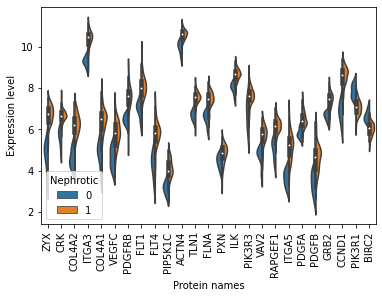

In [90]:
sns.violinplot(x='Protein names', y='Expression level', hue='Nephrotic', data=genename_drop_gather, split=True)
plt.xticks(rotation='vertical')


In [91]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [92]:
genename.columns

Index(['Unnamed: 0', 'ZYX', 'CRK', 'COL4A2', 'ITGA3', 'COL4A1', 'VEGFC',
       'PDGFRB', 'FLT1', 'FLT4', 'PIP5K1C', 'ACTN4', 'TLN1', 'FLNA', 'PXN',
       'ILK', 'PIK3R3', 'VAV2', 'RAPGEF1', 'ITGA5', 'PDGFA', 'PDGFB', 'GRB2',
       'CCND1', 'PIK3R1', 'BIRC2', 'Disease', 'ID', 'Disease2', 'Nephrotic'],
      dtype='object')

In [93]:
feature_names=['ZYX', 'CRK', 'COL4A2', 'ITGA3', 'COL4A1', 'VEGFC',
       'PDGFRB', 'FLT1', 'FLT4', 'PIP5K1C', 'ACTN4', 'TLN1', 'FLNA', 'PXN',
       'ILK', 'PIK3R3', 'VAV2', 'RAPGEF1', 'ITGA5', 'PDGFA', 'PDGFB', 'GRB2',
       'CCND1', 'PIK3R1', 'BIRC2']
X = pd.DataFrame(genename, columns=feature_names)
y = genename.Nephrotic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


In [94]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (80, 25)
X_test Shape: (27, 25)
y_train Shape: (80,)
y_test Shape: (27,)


In [95]:
import random
random.seed(123)

In [96]:
model = RandomForestClassifier(class_weight='balanced',random_state=12)

In [97]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=12)

In [98]:
model.feature_importances_

array([1.72216277e-01, 1.18873068e-01, 6.81022416e-02, 1.05605436e-01,
       2.02499216e-02, 2.41148027e-02, 2.91390882e-02, 8.97435897e-03,
       9.34314574e-03, 1.00000000e-02, 5.67641499e-02, 8.70543332e-02,
       2.35076837e-03, 1.84537070e-17, 3.07738375e-02, 3.35832740e-03,
       4.80903484e-02, 2.04096107e-02, 8.15461099e-02, 2.00000000e-02,
       9.61038961e-03, 3.26068520e-03, 2.96555219e-02, 2.98157022e-02,
       1.06918754e-02])

In [99]:
#feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=True)

In [100]:
#feature_scores

Text(0.5, 1.0, 'focal_adhesion gene feature importance ranking')

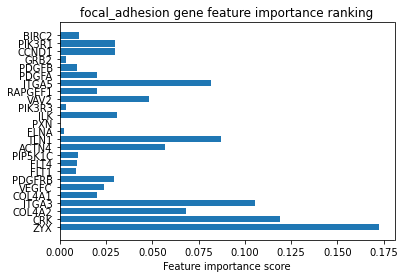

In [101]:
plt.barh(feature_names, model.feature_importances_)
plt.xlabel("Feature importance score")
plt.title("focal_adhesion gene feature importance ranking")

In [102]:

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ZYX        1.722163e-01
CRK        1.188731e-01
ITGA3      1.056054e-01
TLN1       8.705433e-02
ITGA5      8.154611e-02
COL4A2     6.810224e-02
ACTN4      5.676415e-02
VAV2       4.809035e-02
ILK        3.077384e-02
PIK3R1     2.981570e-02
CCND1      2.965552e-02
PDGFRB     2.913909e-02
VEGFC      2.411480e-02
RAPGEF1    2.040961e-02
COL4A1     2.024992e-02
PDGFA      2.000000e-02
BIRC2      1.069188e-02
PIP5K1C    1.000000e-02
PDGFB      9.610390e-03
FLT4       9.343146e-03
FLT1       8.974359e-03
PIK3R3     3.358327e-03
GRB2       3.260685e-03
FLNA       2.350768e-03
PXN        1.845371e-17
dtype: float64

Text(0.5, 0, 'Feature importance score')

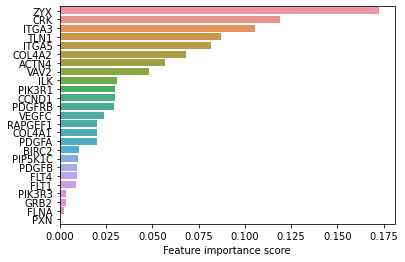

In [103]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel("Feature importance score")

In [104]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [105]:
# class balanced random forest for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[27]]


In [108]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\liden\anaconda3\envs\UNCG\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



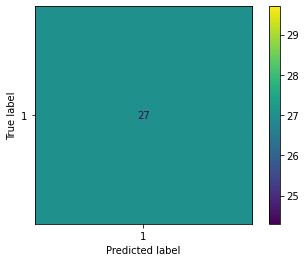

In [109]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [111]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X_train, y_train, sampling_strategy={1: 30, 0: 6},
                      random_state=0)
print('Random undersampling {}'.format(Counter(y_rs)))


Random undersampling Counter({1: 30, 0: 6})


In [112]:

model1 = RandomForestClassifier(random_state=12)

In [113]:
model1.fit(X_rs, y_rs)

RandomForestClassifier(random_state=12)

In [114]:
model1.feature_importances_

array([0.15528916, 0.05899232, 0.04681841, 0.02853976, 0.05237048,
       0.03140093, 0.01559437, 0.01847042, 0.04000831, 0.05524657,
       0.03585859, 0.03800692, 0.01275963, 0.002886  , 0.02020202,
       0.01154401, 0.0702001 , 0.04036797, 0.05785124, 0.04877763,
       0.003299  , 0.00275482, 0.09239503, 0.01010101, 0.05026531])

In [115]:
feature_scores = pd.Series(model1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ZYX        0.155289
CCND1      0.092395
VAV2       0.070200
CRK        0.058992
ITGA5      0.057851
PIP5K1C    0.055247
COL4A1     0.052370
BIRC2      0.050265
PDGFA      0.048778
COL4A2     0.046818
RAPGEF1    0.040368
FLT4       0.040008
TLN1       0.038007
ACTN4      0.035859
VEGFC      0.031401
ITGA3      0.028540
ILK        0.020202
FLT1       0.018470
PDGFRB     0.015594
FLNA       0.012760
PIK3R3     0.011544
PIK3R1     0.010101
PDGFB      0.003299
PXN        0.002886
GRB2       0.002755
dtype: float64

Text(0.5, 0, 'Feature importance score')

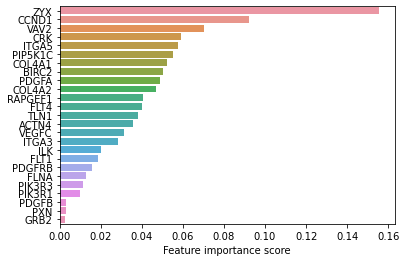

In [116]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel("Feature importance score")

In [117]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
from collections import Counter

In [118]:
sampler = RandomOverSampler(sampling_strategy={1: 80, 0: 40})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('Random undersampling {}'.format(Counter(y_rs)))


Random undersampling Counter({1: 80, 0: 40})


C:\Users\liden\anaconda3\envs\UNCG\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning:

After over-sampling, the number of samples (80) in class 1 will be larger than the number of samples in the majority class (class #1 -> 74)



In [119]:
model2 = RandomForestClassifier(random_state=12)

In [120]:
model2.fit(X_rs, y_rs)

RandomForestClassifier(random_state=12)

In [121]:
model2.feature_importances_

array([2.08677445e-01, 1.29616692e-01, 1.14621850e-01, 1.03861036e-01,
       1.48040474e-03, 8.64478257e-03, 3.62181128e-02, 6.94677871e-05,
       5.43986618e-02, 1.11765760e-02, 4.53295165e-02, 4.71893644e-02,
       2.42183742e-03, 1.09462297e-03, 1.02281521e-03, 1.06696810e-03,
       5.44249268e-02, 3.89625744e-02, 7.88712555e-02, 0.00000000e+00,
       0.00000000e+00, 7.00323126e-03, 3.87430294e-02, 4.62475432e-03,
       1.04800739e-02])

In [122]:
feature_scores = pd.Series(model2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ZYX        0.208677
CRK        0.129617
COL4A2     0.114622
ITGA3      0.103861
ITGA5      0.078871
VAV2       0.054425
FLT4       0.054399
TLN1       0.047189
ACTN4      0.045330
RAPGEF1    0.038963
CCND1      0.038743
PDGFRB     0.036218
PIP5K1C    0.011177
BIRC2      0.010480
VEGFC      0.008645
GRB2       0.007003
PIK3R1     0.004625
FLNA       0.002422
COL4A1     0.001480
PXN        0.001095
PIK3R3     0.001067
ILK        0.001023
FLT1       0.000069
PDGFA      0.000000
PDGFB      0.000000
dtype: float64